In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from selfpeptide.utils.data_utils import load_immunogenicity_dataframes_jointseqs

In [2]:
imm_config = {}
config = {}
config["immunogenicity_df"] = "/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/Processed_TCell_IEDB_beta_summed.csv"
config["pseudo_seq_file"] = "/home/gvisona/Projects/SelfPeptides/processed_data/HLA_embeddings/HLA_pseudoseqs_T5/hla_pseudoseq_mapping.csv"
config["hla_prot_seq_file"] = "/home/gvisona/Projects/SelfPeptides/processed_data/HLA_embeddings/HLA_proteins_T5/hla_proteins_mapping.csv"
config["binding_affinity_df"] = '/home/gvisona/Projects/SelfPeptides/processed_data/Binding_Affinity/DHLAP_binding_affinity_data.csv'
config["binding_model_checkpoint"] = '/home/gvisona/Projects/SelfPeptides/trained_models/BindingModels/floral-sweep-3/checkpoints/001_checkpoint.pt'
config["binding_model_config"] = '/home/gvisona/Projects/SelfPeptides/trained_models/BindingModels/floral-sweep-3/config.json'
config["dhlap_df"] = '/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/DHLAP_immunogenicity_data.csv'
config["test_size"] = 0.15
config["val_size"] = 0.1
config["seed"]= 0


In [3]:
quantiles = [0.1, 0.9]

In [4]:
iedb_df, dhlap_imm_df = load_immunogenicity_dataframes_jointseqs(config, split_data=False)
iedb_df 

,Peptide,HLA,Qualitative Measurement,Peptide length,Number of Subjects Tested,Number of Subjects Positive,Alpha,Beta,Allele Pseudo-sequence,Allele Protein sequence,Target,Sample,Peptide Length,Distr. Mean,Distr. Variance,Distr. Mode,Distr. Precision,Stratification_index
0,GILGFVFTL,HLA-A02:01,Positive,9,898.0,513.0,514.0,386.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,GILGFVFTL_HLA-A02:01,9,0.571111,0.000272,0.571269,900.0,HLA-A02:01_1
1,NLVPMVATV,HLA-A02:01,Positive,9,578.0,467.0,468.0,112.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,NLVPMVATV_HLA-A02:01,9,0.806897,0.000268,0.807958,580.0,HLA-A02:01_1
2,QYIKWPWYI,HLA-A24:02,Positive,9,461.0,291.0,292.0,171.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,1,QYIKWPWYI_HLA-A24:02,9,0.630670,0.000502,0.631236,463.0,HLA-A24:02_1
3,FLPSDFFPSV,HLA-A02:01,Positive,10,313.0,216.0,217.0,98.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,FLPSDFFPSV_HLA-A02:01,10,0.688889,0.000678,0.690096,315.0,HLA-A02:01_1
4,YLQPRTFLL,HLA-A02:01,Positive-High,9,274.0,186.0,187.0,89.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,YLQPRTFLL_HLA-A02:01,9,0.677536,0.000789,0.678832,276.0,HLA-A02:01_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27990,KEYTPQIYTY,HLA-B49:01,Negative,10,1.0,0.0,1.0,2.0,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,MRVTAPRTVLLLLSAALALTETWAGSHSMRYFHTAMSRPGRGEPRF...,0,KEYTPQIYTY_HLA-B49:01,10,0.333333,0.055556,0.000000,3.0,HLA-B49:01_0
27991,IQQLYEFRK,HLA-A33:03,Negative,9,1.0,0.0,1.0,2.0,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,0,IQQLYEFRK_HLA-A33:03,9,0.333333,0.055556,0.000000,3.0,HLA-A33:03_0
27992,IQQLYEFRK,HLA-A33:01,Negative,9,1.0,0.0,1.0,2.0,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWH,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,0,IQQLYEFRK_HLA-A33:01,9,0.333333,0.055556,0.000000,3.0,HLA-A33:01_0
27993,DELVDPINY,HLA-B49:01,Negative,9,1.0,0.0,1.0,2.0,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,MRVTAPRTVLLLLSAALALTETWAGSHSMRYFHTAMSRPGRGEPRF...,0,DELVDPINY_HLA-B49:01,9,0.333333,0.055556,0.000000,3.0,HLA-B49:01_0


In [5]:


# for i, row in iedb_df.iterrows():
#     alpha = row["Alpha"]
#     beta = row["Beta"]    
    
#     lower_bound = stats.beta.ppf(quantiles[0], alpha, beta)
#     upper_bound = stats.beta.ppf(quantiles[1], alpha, beta)
#     delta = upper_bound-lower_bound
    

In [6]:
iedb_df["CI_lower_bound"] = stats.beta.ppf(quantiles[0], iedb_df["Alpha"], iedb_df["Beta"])
iedb_df["CI_upper_bound"] = stats.beta.ppf(quantiles[1], iedb_df["Alpha"], iedb_df["Beta"])
iedb_df["CI_width"] = iedb_df["CI_upper_bound"] - iedb_df["CI_lower_bound"]
iedb_df

,Peptide,HLA,Qualitative Measurement,Peptide length,Number of Subjects Tested,Number of Subjects Positive,Alpha,Beta,Allele Pseudo-sequence,Allele Protein sequence,...,Sample,Peptide Length,Distr. Mean,Distr. Variance,Distr. Mode,Distr. Precision,Stratification_index,CI_lower_bound,CI_upper_bound,CI_width
0,GILGFVFTL,HLA-A02:01,Positive,9,898.0,513.0,514.0,386.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,GILGFVFTL_HLA-A02:01,9,0.571111,0.000272,0.571269,900.0,HLA-A02:01_1,0.549939,0.592215,0.042276
1,NLVPMVATV,HLA-A02:01,Positive,9,578.0,467.0,468.0,112.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,NLVPMVATV_HLA-A02:01,9,0.806897,0.000268,0.807958,580.0,HLA-A02:01_1,0.785683,0.827656,0.041973
2,QYIKWPWYI,HLA-A24:02,Positive,9,461.0,291.0,292.0,171.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,...,QYIKWPWYI_HLA-A24:02,9,0.630670,0.000502,0.631236,463.0,HLA-A24:02_1,0.601817,0.659280,0.057464
3,FLPSDFFPSV,HLA-A02:01,Positive,10,313.0,216.0,217.0,98.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,FLPSDFFPSV_HLA-A02:01,10,0.688889,0.000678,0.690096,315.0,HLA-A02:01_1,0.655230,0.722032,0.066801
4,YLQPRTFLL,HLA-A02:01,Positive-High,9,274.0,186.0,187.0,89.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,YLQPRTFLL_HLA-A02:01,9,0.677536,0.000789,0.678832,276.0,HLA-A02:01_1,0.641235,0.713284,0.072049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27990,KEYTPQIYTY,HLA-B49:01,Negative,10,1.0,0.0,1.0,2.0,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,MRVTAPRTVLLLLSAALALTETWAGSHSMRYFHTAMSRPGRGEPRF...,...,KEYTPQIYTY_HLA-B49:01,10,0.333333,0.055556,0.000000,3.0,HLA-B49:01_0,0.051317,0.683772,0.632456
27991,IQQLYEFRK,HLA-A33:03,Negative,9,1.0,0.0,1.0,2.0,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,...,IQQLYEFRK_HLA-A33:03,9,0.333333,0.055556,0.000000,3.0,HLA-A33:03_0,0.051317,0.683772,0.632456
27992,IQQLYEFRK,HLA-A33:01,Negative,9,1.0,0.0,1.0,2.0,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWH,MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRF...,...,IQQLYEFRK_HLA-A33:01,9,0.333333,0.055556,0.000000,3.0,HLA-A33:01_0,0.051317,0.683772,0.632456
27993,DELVDPINY,HLA-B49:01,Negative,9,1.0,0.0,1.0,2.0,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,MRVTAPRTVLLLLSAALALTETWAGSHSMRYFHTAMSRPGRGEPRF...,...,DELVDPINY_HLA-B49:01,9,0.333333,0.055556,0.000000,3.0,HLA-B49:01_0,0.051317,0.683772,0.632456


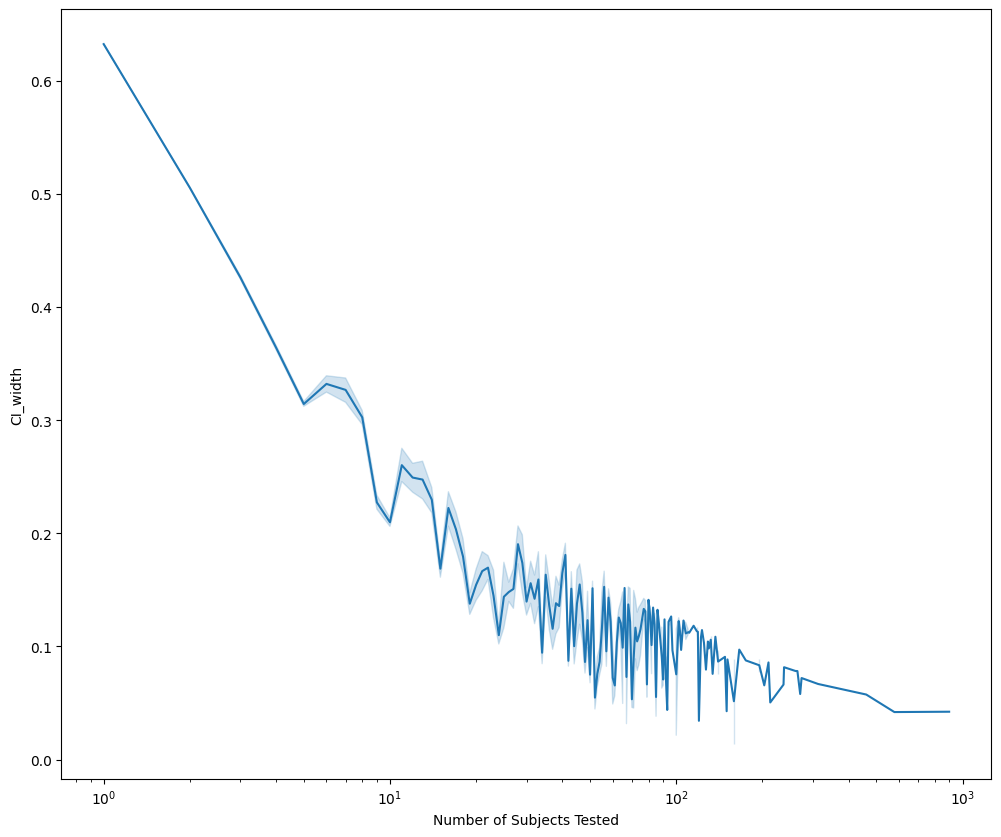

In [7]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(iedb_df, x="Number of Subjects Tested", y="CI_width", ax=ax)
ax.set_xscale("log")

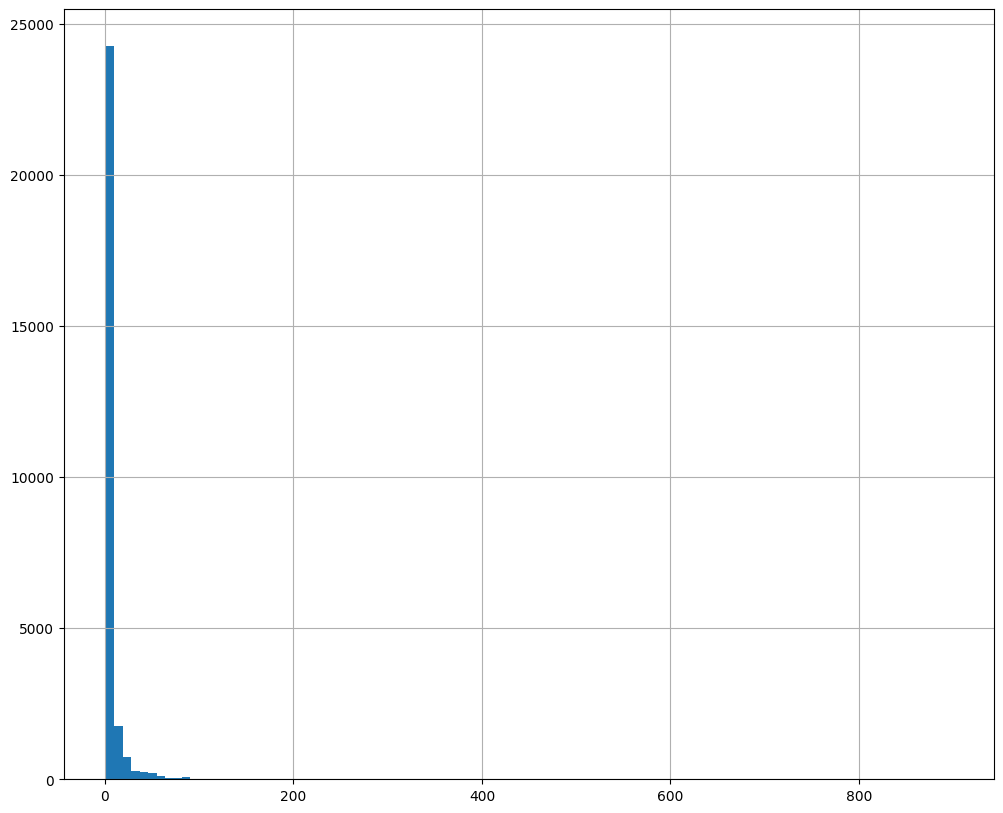

In [8]:
fig, ax = plt.subplots(figsize=(12,10))

iedb_df["Number of Subjects Tested"].hist(bins=100, ax=ax)
# ax.set_xscale("log")
plt.show()


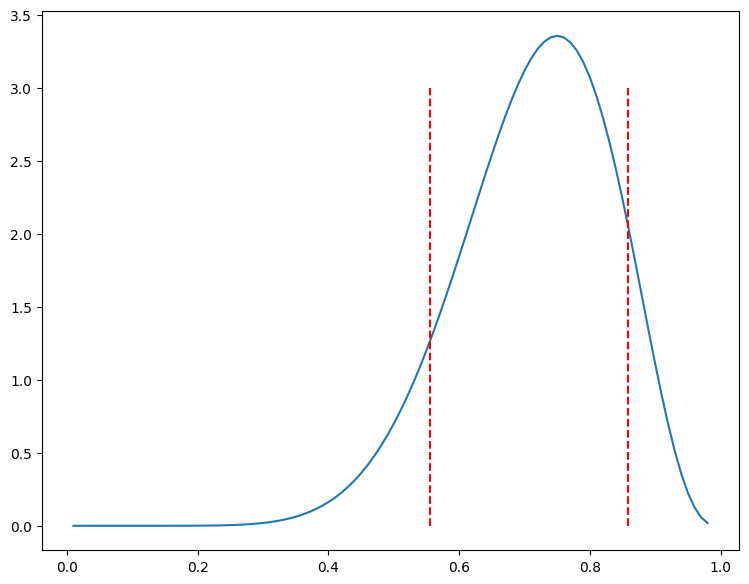

In [14]:
a = 10
b = 4

q1 = 0.1
q2 = 0.9

q_hat1 = stats.beta.ppf(q1, a, b)
q_hat2 = stats.beta.ppf(q2, a, b)


xx = np.arange(0.01, 0.99, 0.01)
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(xx, stats.beta.pdf(xx, a, b))
ax.vlines(q_hat1, 0, 3, color="red", linestyle="dashed")
ax.vlines(q_hat2, 0, 3, color="red", linestyle="dashed")

plt.show()

In [15]:
stats.beta.cdf(q_hat1, a, b)

0.09999999999999992

In [25]:
def minfun(x):
    return np.abs(q_hat1-stats.beta.ppf(q1, x[0], x[1])) + np.abs(q_hat2-stats.beta.ppf(q2, x[0], x[1]))

In [26]:
from scipy.optimize import minimize, rosen, rosen_der

In [27]:
minimize(minfun, (3,3))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.18414522282058393
        x: [ 3.759e+00  2.241e+00]
      nit: 1
      jac: [-5.696e-02 -3.461e-03]
 hess_inv: [[ 3.805e+00 -2.564e+00]
            [-2.564e+00  3.322e+00]]
     nfev: 348
     njev: 115

In [28]:
(a, b)

(10, 4)

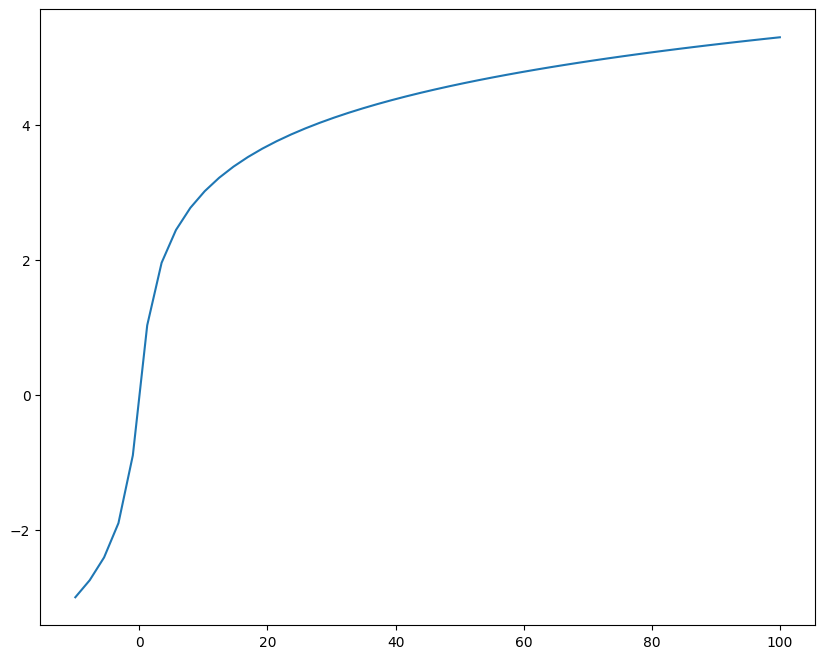

In [32]:
xx= np.linspace(-10,100)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(xx, np.arcsinh(xx))
plt.show()

In [33]:
def softplus(x):
    return np.log(1+np.exp(x))

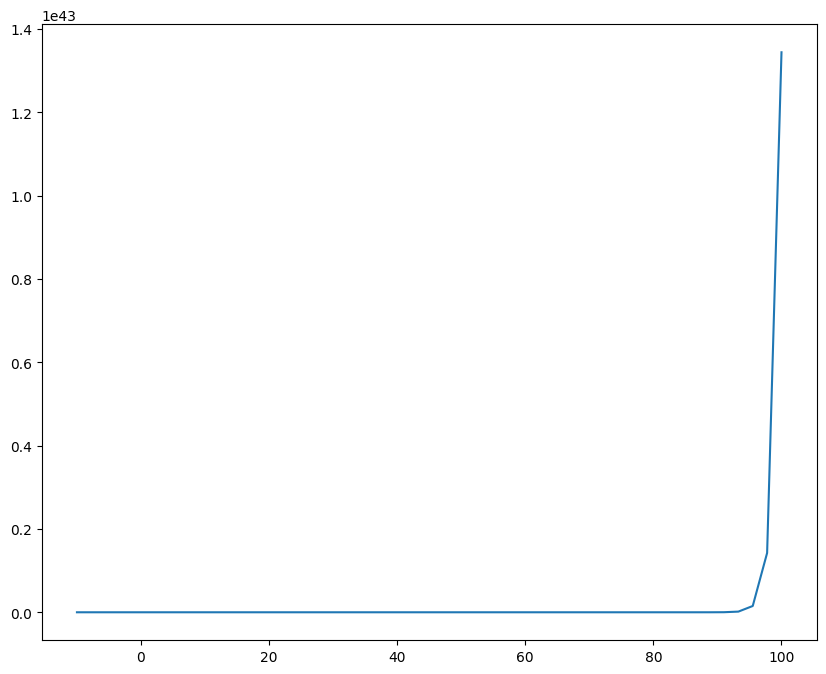

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(xx, np.sinh(softplus(xx)))
plt.show()